In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

0 spot5-picture.bmp
1 spot5-spectra_1.txt
2 spot5-spectra_2.txt
3 spot5-spectra_3.txt
4 spot5-spectra_4.txt
5 spot5-spectra_5.txt
6 .ipynb_checkpoints


In [47]:
#energies of EDS spectral lines of interest... instead of using some large python library
klines = {"Si":[1.739], "Al":[1.486], "Mg":[1.253], "O":[0.525], "C":[0.277], 
          "Be": [0.110], "Na":[1.041], "K":[3.313], "Fe":[0.705, 6.404, 7.058],
          "Ca":[3.690], "Ti":[0.452, 4.511], "Mn":[0.637, 5.899], "Ni":[0.851, 7.478],
          "Cu":[0.93, 8.047], "Zn":[1.012, 8.634], "Zr":[2.042, 15.775], "Ag":[2.984],
          "S":[2.307], "N":[0.392], "P":[2.013], "Cr":[0.573, 5.411], "Ti":[4.512],
          "Ce":[0.883, 4.839]}
steel_comp = {"C":0.07, "Cr":0.185, "Mn":0.02, "Si":0.01, "Ni":0.0975, "N":0.11, 
              "P":0.05, "S":0.03} #for 304 stainless steel
balance = 0
for i in steel_comp:
    balance += steel_comp[i]
steel_comp["Fe"] = 1 - balance
   

In [48]:
def parser(f):
        lines = open(f, 'r').readlines()
        E = []
        I = []
        for l in lines[28:]:
            spl = l.split(' ')
            #remove empty elements from spl
            spl = list(filter(None, spl))
            E.append(float(spl[0]))
            I.append(float(spl[-1]))
        return np.array(E), np.array(I)
    
def apply_labels(ax, elements):
    #get vertical highest point in the axis
    ylim = ax.get_ylim()
    for e in elements:
        for k in klines[e]:
            ax.axvline(k, color='r', linestyle='--', linewidth=0.5)
            ax.annotate(e, xy=(k, np.max(ylim)), fontsize=13, color='k', ha='center')

def get_peak_values(E, I, elements):
    peaks = {}
    for e in elements:
        peaks[e] = []
    for k in klines[e]:
        idx = np.argmin(np.abs(E - k))
        peaks[e].append((E[idx], I[idx]))
    return peaks

In [109]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot20/'

files = os.listdir(directory)
times =  [os.path.getmtime(directory+fname) for fname in files]
ii=0
for fname in [files for _, files in sorted(zip(times, files))]:
    print(ii, fname)
    ii+=1

0 spectra_1.txt
1 spectra_2.txt
2 spectra_3.txt
3 spotmap.bmp


### spot 5

Text(0.5, 0, 'E [keV]')

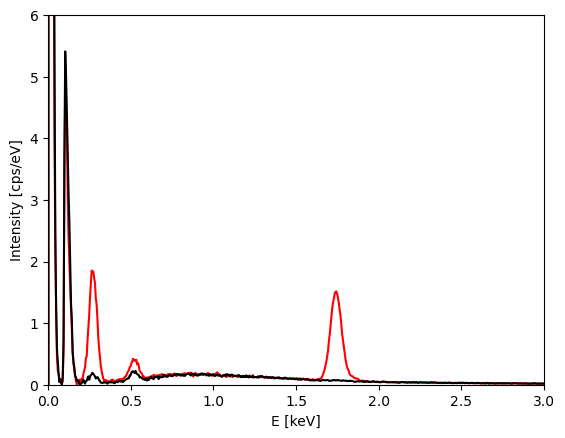

In [78]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot5/'

file = 'spot5-spectra_1.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color= 'r')

file = 'spot5-spectra_2.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color = 'k')

file = 'spot5-spectra_3.txt'
energy,intensity = parser(directory+file)
#plt.plot(energy,intensity)

file = 'spot5-spectra_4.txt'
energy,intensity = parser(directory+file)
#plt.plot(energy,intensity)

file = 'spot5-spectra_5.txt'
energy,intensity = parser(directory+file)
#plt.plot(energy,intensity)

plt.xlim(0,3)
plt.ylim(0,6)
#plt.xscale('log')

#plt.yscale('log')
plt.ylabel('Intensity [cps/eV]')
plt.xlabel('E [keV]')

### spot 7

Text(0.5, 0, 'E [keV]')

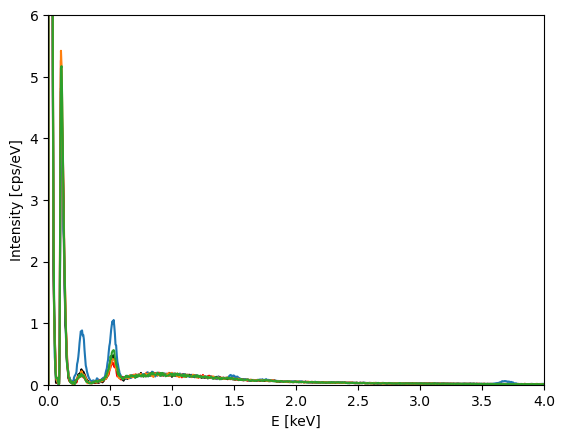

In [92]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot7/'


file = 'spectra_1.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color= 'r')

file = 'spectra_2.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color = 'k')

file = 'spectra_3.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3)

file = 'spectra_4.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3)

file = 'spectra_5.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3)

plt.xlim(0,4)
#plt.ylim(0,6)
#plt.xscale('log')

#plt.yscale('log')
plt.ylabel('Intensity [cps/eV]')
plt.xlabel('E [keV]')

Text(0.5, 0, 'E [keV]')

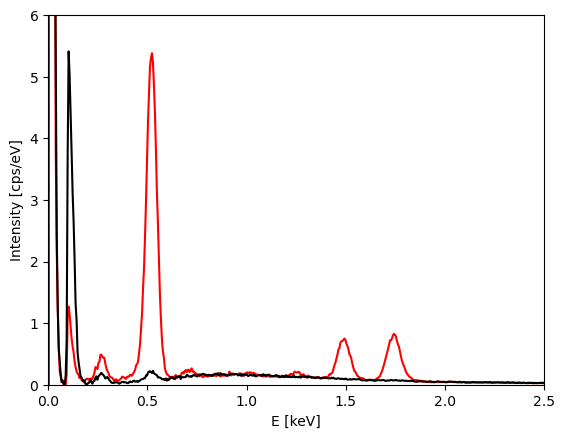

In [107]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot17/'
directory5 = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot5/'


file = 'spectra.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color= 'r')

file = 'spot5-spectra_2.txt'
energy,intensity = parser(directory5+file)
plt.plot(energy,intensity/energy/1e3, color = 'k')


plt.xlim(0,2.5)
plt.ylim(0,6)
#plt.xscale('log')

#plt.yscale('log')
plt.ylabel('Intensity [cps/eV]')
plt.xlabel('E [keV]')

Text(0.5, 0, 'E [keV]')

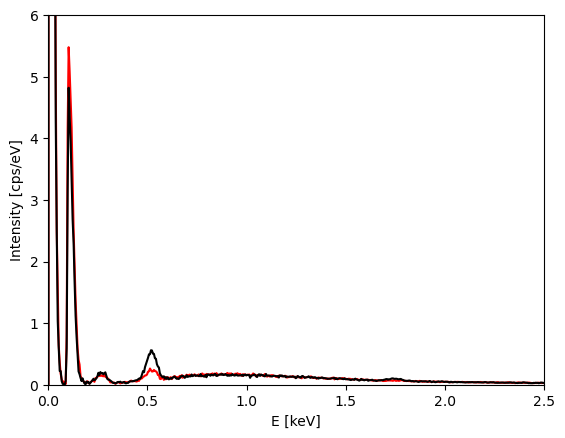

In [115]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot20/'
directory5 = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot5/'


file = 'spectra_1.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color= 'r')
file = 'spectra_2.txt'
energy,intensity = parser(directory+file)
#plt.plot(energy,intensity/energy/1e3, color= 'r')

file = 'spectra_3.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity/energy/1e3, color= 'k')

#file = 'spot5-spectra_2.txt'
#energy,intensity = parser(directory5+file)
#plt.plot(energy,intensity/energy/1e3, color = 'k')


plt.xlim(0,2.5)
plt.ylim(0,6)
#plt.xscale('log')

#plt.yscale('log')
plt.ylabel('Intensity [cps/eV]')
plt.xlabel('E [keV]')

In [94]:
directory = '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot17/'


file = 'spectra_1.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity, color= 'r')

file = 'spectra_2.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity, color = 'k')

file = 'spectra_3.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity)

file = 'spectra_4.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity)

file = 'spectra_5.txt'
energy,intensity = parser(directory+file)
plt.plot(energy,intensity)

plt.xlim(0,4)
#plt.ylim(0,6)
#plt.xscale('log')

#plt.yscale('log')
plt.ylabel('Intensity [cps/eV]')
plt.xlabel('E [keV]')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mossbauer/Data/alignment_data/20240516_beryllium/spot17/spectra_1.txt'